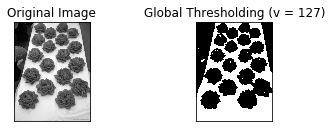

In [10]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('let.jpg',0)
img = cv.medianBlur(img,5)
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
titles = ['Original Image', 'Global Thresholding (v = 127)']
images = [img, th1]
for i in range(2):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

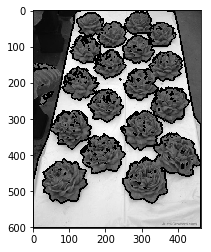

In [6]:
im = cv.imread('let.jpg')
imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(imgray, 127, 255, 0)
im2, contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
n = cv.drawContours(imgray, contours, -1, (0,255,0), 3)
plt.imshow(n, 'gray')

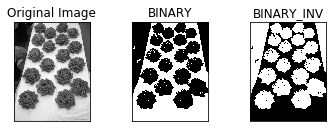

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('let.jpg')
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
ret,th1 = cv.threshold(gray_img,127,255,cv.THRESH_BINARY)
ret,th2 = cv.threshold(gray_img,127,255,cv.THRESH_BINARY_INV)

titles = ['Original Image','BINARY','BINARY_INV']
images = [gray_img, th1, th2]
for i in range(3):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

[81, 659.5, 359.0]
===== red ====
37.78515625
33.2421875
===== green ====
57.44140625
41.0625
===== blue ====
6.18359375
43.453125


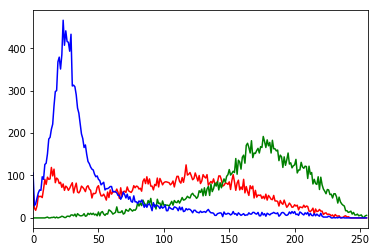

[114, 119.0, 357.5]
===== red ====
27.421875
61.38671875
===== green ====
61.92578125
74.47265625
===== blue ====
0.7421875
85.984375


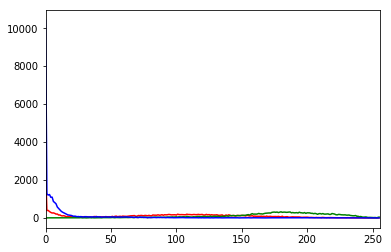

[111, 390.5519714355469, 356.2348327636719]
===== red ====
47.17578125
64.41015625
===== green ====
63.4296875
76.2890625
===== blue ====
2.3203125
43.90234375


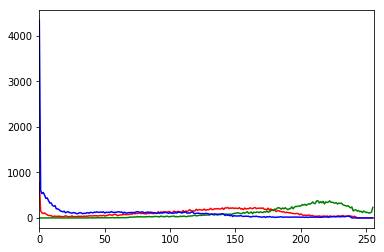

[91, 396.13916015625, 113.86592102050781]
===== red ====
34.80859375
57.19140625
===== green ====
52.40625
61.7578125
===== blue ====
8.9453125
65.61328125


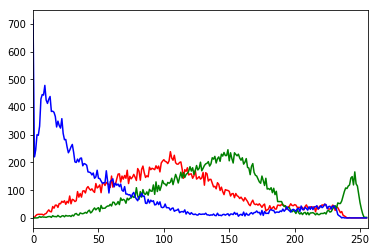

[115, 656.9933471679688, 115.4032974243164]
===== red ====
1.2734375
61.53515625
===== green ====
59.4453125
76.4609375
===== blue ====
1.69921875
107.0703125


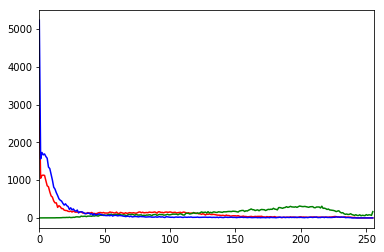

[115, 121.96553802490234, 115.33509063720703]
===== red ====
1.6171875
62.24609375
===== green ====
60.5859375
77.9140625
===== blue ====
1.8203125
107.6328125


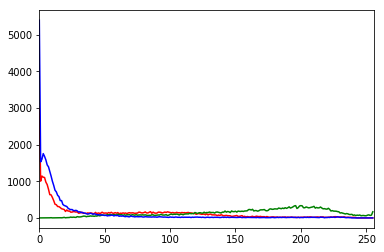

==== fitness_factors % (ideal: [1, 1, 0]) ====
[0.24608271545769783, 0.9463087248322147, 0.34870297883632984]
[0.4382988920526627, 0.566426562921305, 0.3356986899563319]
[0.4451326435679851, 0.6873780514243594, 0.4132633628168776]
[0.37157678103239267, 0.5616935902314159, 0.3346173383000339]
[0.5635815172958191, 0.5449892350814478, 0.31200089261520314]
[0.5634715683234192, 0.9523749921772326, 0.31443209584614173]


In [ ]:
lettuce_num = 6

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img0 = cv.imread('letucce.jpeg')
img = cv.imread('letucce.jpeg')

[xLen, yLen] = img.shape[:2]

ideal_area = xLen * yLen / lettuce_num

xL = np.arange(xLen)
yL = np.arange(yLen)

R_factor = 1.07
B_factor = 1.05

for i in xL:
    for j in yL:
        green_px = img0[i, j, 1]
        if green_px > R_factor * img[i, j, 0] and green_px > B_factor * img[i, j, 2]:
            img[i, j, :] = [255, 255, 255]
        else:
            img[i, j, :] = [0, 0, 0]

gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
ret,th1 = cv.threshold(gray_img,200,255,cv.THRESH_BINARY)
img2,contours,hierarchy = cv.findContours(th1, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
#img3 = cv.drawContours(image, contours, -1, (0,255,0), 3)

fit1 = []
fit2 = []
fit3 = []

for c in contours:
    # finally, get the min enclosing circle
    (rx, ry), radius = cv.minEnclosingCircle(c)
    center = (int(rx), int(ry))
    radius = int(radius)
    
    area = cv.contourArea(c)
    
    # and draw the circle in blue
    if radius > 50:
        fit1.append(area / ideal_area)
        
        # get the bounding rect
        y, x, h, w = cv.boundingRect(c)
        # draw a green rectangle to visualize the bounding rect
        #cv.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)  
                        
        mask = np.zeros(img0.shape[:2], np.uint8)
        
        mask[x:x+w, y:y+h] = th1[x:x+w, y:y+h]   
        
        hist_mask_R = cv.calcHist([img0],[2],mask,[256],[0,256])
        hist_mask_G = cv.calcHist([img0],[1],mask,[256],[0,256])
        hist_mask_B = cv.calcHist([img0],[0],mask,[256],[0,256])

        # Number of total frequencies of the actual mask (no matter the channel :p !!!)
        total_mask_fc = np.sum(hist_mask_R)
        
        r_fc = []
        g_fc = []
        b_fc = []
        
        r_val = []
        g_val = []
        b_val = []
        
        for k in np.arange(256):
            r_percentage = hist_mask_R[k][0] / total_mask_fc
            g_percentage = hist_mask_G[k][0] / total_mask_fc
            b_percentage = hist_mask_B[k][0] / total_mask_fc
            
            if r_percentage >= 0.005:
                r_fc.append(hist_mask_R[k][0])
                r_val.append(k)
                
            if g_percentage >= 0.005:
                g_fc.append(hist_mask_G[k][0])
                g_val.append(k)
                
            if b_percentage >= 0.005:
                b_fc.append(hist_mask_B[k][0])
                b_val.append(k)
         
        if r_fc == []:
            r_fc = [0]
            r_val = [0]
        
        if g_fc == []:
            g_fc = [0]
            g_val = [0]
            
        if b_fc == []:
            b_fc = [0]
            b_val = [0]
    
        from functools import reduce
        
        r_fc_av = reduce((lambda x, y: x + y),r_fc) / 256
        g_fc_av = reduce((lambda x, y: x + y),g_fc) / 256
        b_fc_av = reduce((lambda x, y: x + y),b_fc) / 256
        
        fit2.append(g_val_av / (r_val_av + g_val_av + b_val_av))

        r_val_av = reduce((lambda x, y: x + y),r_val) / 256
        g_val_av = reduce((lambda x, y: x + y),g_val) / 256
        b_val_av = reduce((lambda x, y: x + y),b_val) / 256
        
        fit3.append(g_fc_av / (r_fc_av + g_fc_av + b_fc_av))
                        
        print([radius, rx, ry])
        print('===== red ====')
        print(r_val_av)
        print(r_fc_av)
        print('===== green ====')
        print(g_val_av)
        print(g_fc_av)
        print('===== blue ====')
        print(b_val_av)
        print(b_fc_av)
            
        plt.plot(hist_mask_R, 'r')
        plt.plot(hist_mask_G, 'g')
        plt.plot(hist_mask_B, 'b')
        plt.xlim([0,256])
        plt.show()
        
        print('===========================================================================')

        # get the min area rect
        rect = cv.minAreaRect(c)
        box = cv.boxPoints(rect)
        # convert all coordinates floating point values to int
        box = np.int0(box)
        # draw a red 'nghien' rectangle
        #cv.drawContours(img, [box], 0, (0, 0, 255))
        
        cv.drawContours(img, [box], 0, (0, 0, 255))
        cv.rectangle(img, (y, x), (y+h, x+w), (0, 255, 0), 2)
        img_final = cv.circle(img, center, radius, (255, 0, 0), 2)

print('==== fitness_factors % (ideal: [1, 1, 0]) ====')
for k in np.arange(len(fit1)):
    print([fit1[k], fit2[k], fit3[k]])
        
#img4 = cv.drawContours(img_final, contours, -1, (255, 255, 0), 1)

#cv.imshow('img3', img3)
#cv.imshow('img', img)
#cv.imshow('img4', img4)
#cv.imshow('img_final', img_final)
cv.imshow('img0', img0)
#cv.imshow('mask', mask)
#cv.imshow('th1', th1)

cv.waitKey(0)
cv.destroyAllWindows()

In [175]:
reduce((lambda x,y : x+y), fit1)

1.0

In [143]:
fit1.append(radius)

In [186]:
min([xLen, yLen])

449